# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [2]:
import pandas as pd

loan_data = pd.read_csv("loan_data.csv")

loan_data.head()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

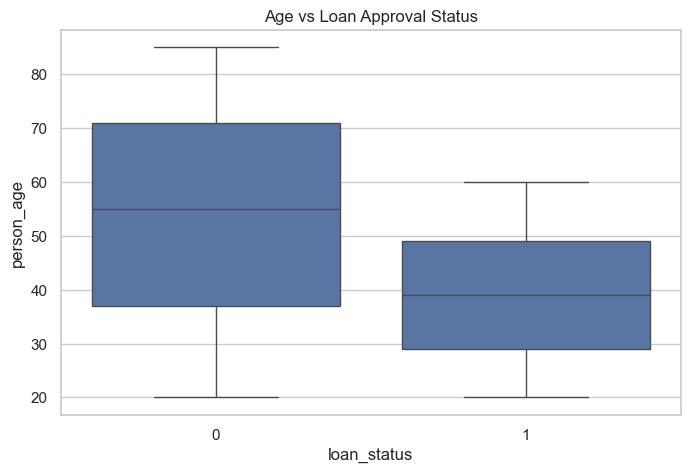

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="person_age", data=loan_data)
plt.title("Age vs Loan Approval Status")
plt.show()

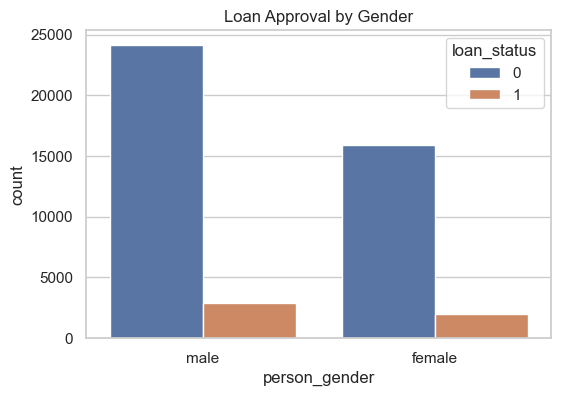

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="person_gender", hue="loan_status", data=loan_data)
plt.title("Loan Approval by Gender")
plt.show()

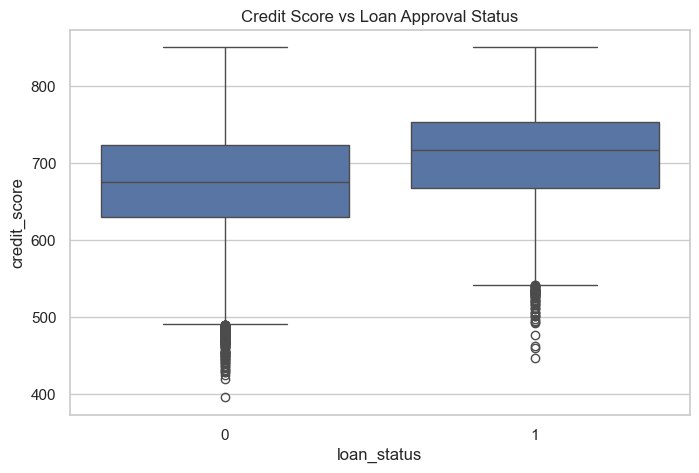

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="credit_score", data=loan_data)
plt.title("Credit Score vs Loan Approval Status")
plt.show()

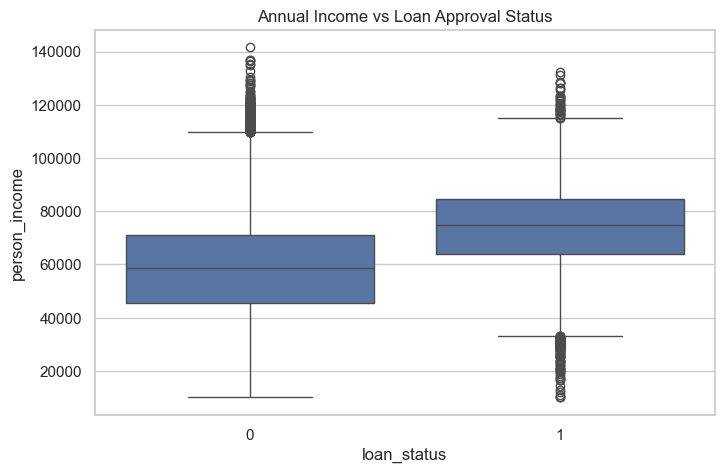

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="person_income", data=loan_data)
plt.title("Annual Income vs Loan Approval Status")
plt.show()

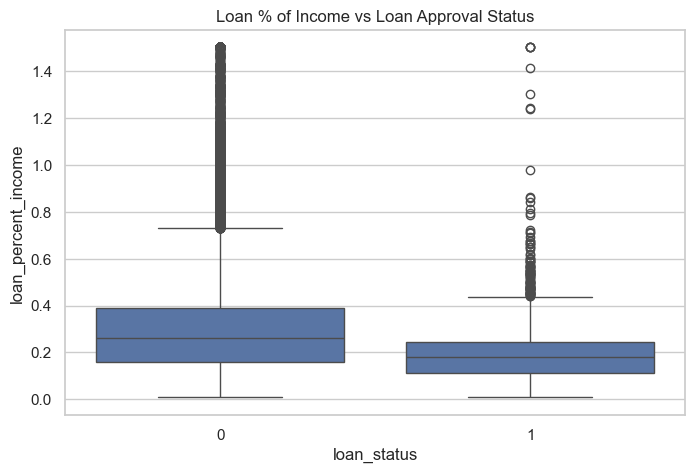

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="loan_percent_income", data=loan_data)
plt.title("Loan % of Income vs Loan Approval Status")
plt.show()

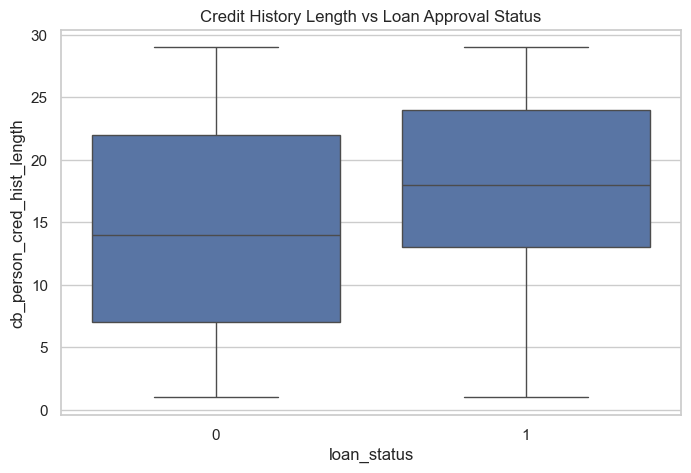

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status", y="cb_person_cred_hist_length", data=loan_data)
plt.title("Credit History Length vs Loan Approval Status")
plt.show()

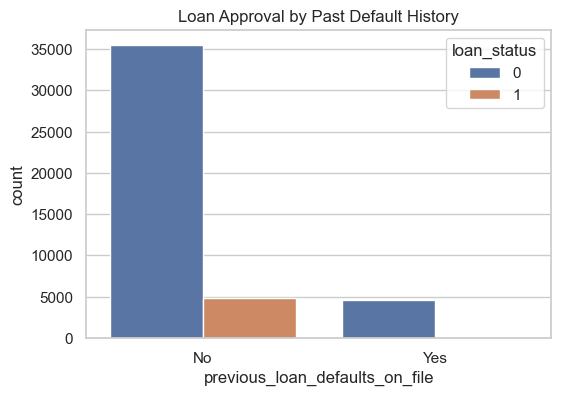

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="previous_loan_defaults_on_file", hue="loan_status", data=loan_data)
plt.title("Loan Approval by Past Default History")
plt.show()

Based on the visualizations, several patterns emerge that help explain the factors influencing loan approvals. The plots comparing credit score, income, loan percent of income, and previous loan defaults to loan approval status reveal clear separations between approved and denied applicants. Individuals with higher credit scores and incomes tend to receive approvals more frequently, while those with past defaults or high loan-to-income ratios are more often rejected. Similarly, applicants with longer credit histories generally have higher approval rates, suggesting that the model places weight on financial reliability and repayment history, both legitimate factors in lending decisions.
When examining age and gender, the patterns are less straightforward but potentially concerning. If younger applicants are consistently denied loans despite having similar financial qualifications as older applicants, this could indicate age-related bias. Likewise, if one gender, such as women, shows a notably lower approval rate independent of financial metrics, it may signal gender-based discrimination. While minor differences can arise from correlated factors like income or experience, significant disparities in these demographic categories point to possible model bias or unintentional discrimination.
These findings have important legal and ethical implications. The Equal Credit Opportunity Act prohibits lenders from discriminating based on protected characteristics such as age, sex, race, or marital status. Even if the model does not directly use these features, it could still create a disparate impact if proxies, like employment length or education, indirectly disadvantage certain groups. Therefore, the financial institution should conduct a fairness audit to determine whether approval rates, true positive rates, or decision boundaries differ substantially across demographic groups. Tools like SHAP feature importance or demographic parity analysis can help confirm whether age or gender contributes meaningfully to model predictions.
In conclusion, the visualizations suggest that the model is primarily influenced by appropriate financial features, such as credit score, income, and past default history, but potential disparities related to age and gender warrant further scrutiny. If these demographic factors are found to significantly affect outcomes, the institution could face legal challenges for discriminatory lending practices. To mitigate risk, the company should ensure model transparency, remove or adjust biased features, and implement ongoing monitoring to maintain fairness in future lending decisions. 
